In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
DataFolder = "/content/drive/MyDrive/SDAAI/Capstone Project"

In [3]:
pip install ultralyticsplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import torch
import cv2
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-8 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
#image_path = DataFolder+"/Safety Hat/Images/hard_hat_workers0.png" # or file, Path, PIL, OpenCV, numpy, list
image_path = DataFolder+"/Safety Hat/Images/Helmet-Example01.jpg"

# Inference
results = model(image_path) 

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

image 1/1: 760x1095 1 person
Speed: 39.8ms pre-process, 338.5ms inference, 6.4ms NMS per image at shape (1, 3, 448, 640)


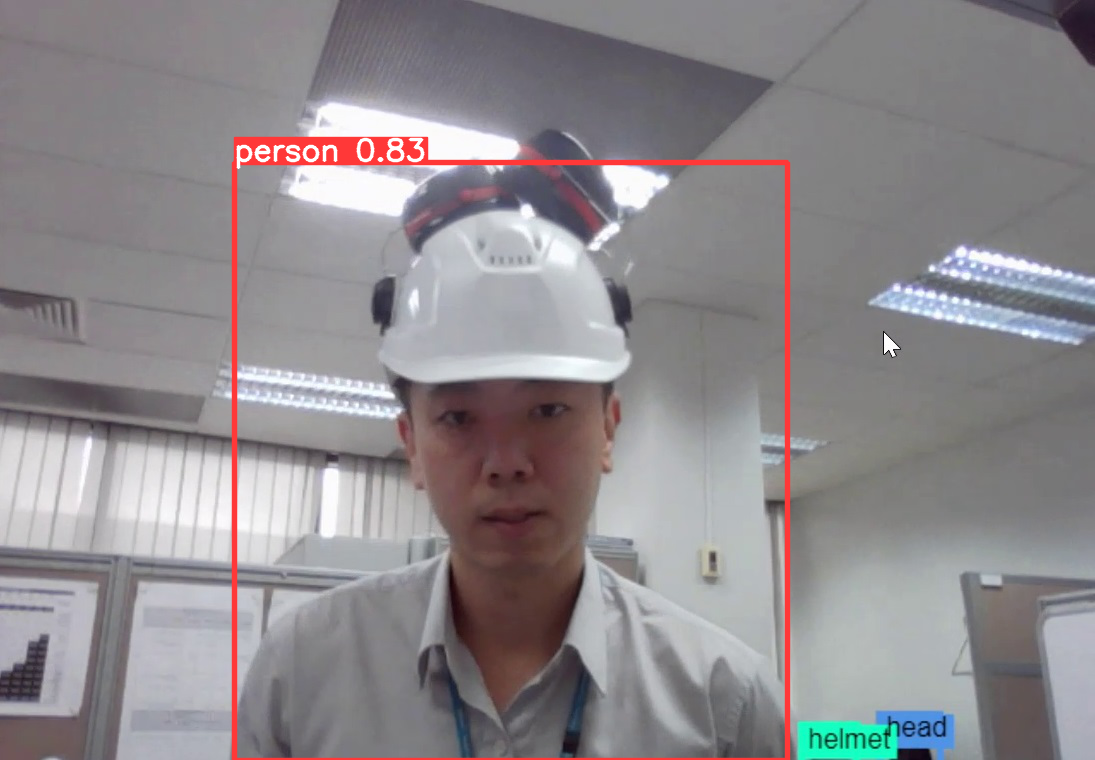

         xmin        ymin        xmax   ymax  confidence  class    name
0  234.176651  162.732224  787.136841  760.0    0.826076      0  person
Object 0 person


In [6]:
results.show()
print(results.pandas().xyxy[0])

for i in range(len(results.pandas().xyxy[0].name)):
    print("Object",i,results.pandas().xyxy[0].name[i])

Ultralytics YOLOv8.0.43 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/SDAAI/Capstone Project/Safety Hat/Images/Helmet-Example01.jpg: 448x640 1 Hardhat, 1424.8ms
Speed: 12.4ms preprocess, 1424.8ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


tensor([[370.00000, 199.00000, 641.00000, 392.00000,   0.70751,   0.00000]])


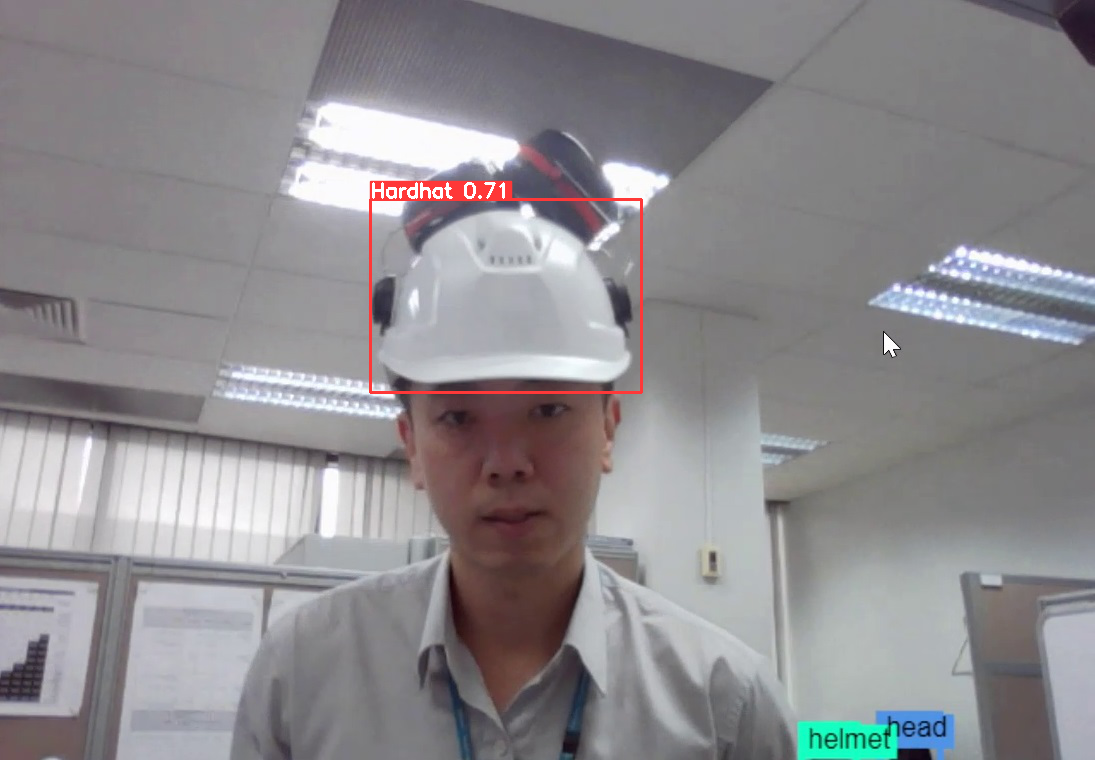

In [7]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('keremberke/yolov8m-hard-hat-detection')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# set image
#image = 'https://github.com/RP-SDAAI/Capstone-Project/blob/72573878f2546c1c2984c3e1006ef8e7c72672ec/Helmet-Example01.jpg'

#image = 'https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg'

# perform inference
results = model.predict(image_path)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image_path, result=results[0])
render.show()

In [ ]:
vid = cv2.VideoCapture(0) # For streaming links (#0 : Computer Webcam. Otherwise need to know the RTSP Url of the Webcam, or the IP address that connect directly to the CCTV)
while True:
	rdy,frame = vid.read()
	print(rdy)
	try:
	  cv2.imshow('Video Live IP cam',frame)
	  key = cv2.waitKey(1) & 0xFF
	  if key ==ord('q'):
	    break
	except:
		pass

vid.release()
cv2.destroyAllWindows()

Streaming output truncated to the last 5000 lines.
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
F